In [4]:
import networkx as nx
import matplotlib. pyplot as plt

In [6]:
#creación de grafo dirigido
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E"])
G.add_edges_from([("A","B"),
                 ("A","D"),
                 ("B","C"),
                 ("C","E"),
                 ("D","E")])

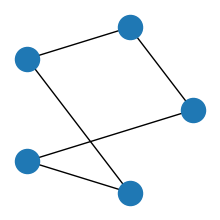

In [7]:
plt.figure(figsize=(2,2))
nx.draw_circular(G) #sin dirigir

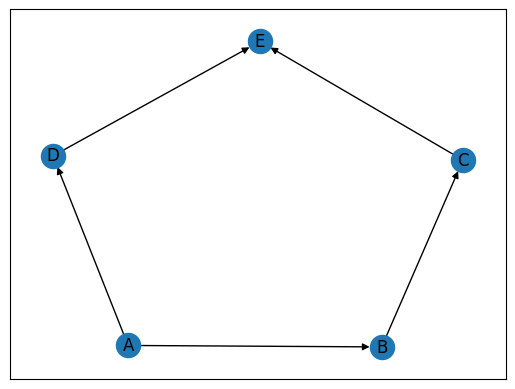

In [9]:
nx.draw_networkx(G,arrows=True,arrowstyle="-|>") #ya dirigido

In [10]:
#Crear DataFrame con pesos 
import pandas as pd
index = ["A", "B", "C", "D","E"]
matrix = pd.DataFrame(columns=index, index=index)
matrix
matrix.iloc[0,1]=2.1
matrix.iloc[1,0]=8.6
matrix.iloc[0,3]=7.5
matrix.iloc[3,0]=6.6
matrix.iloc[3,4]=4.2
matrix.iloc[4,3]=0.8
matrix.iloc[4,2]=3.56
matrix.iloc[2,4]=1.1
matrix.iloc[1,2]=10.2
matrix.iloc[2,1]=7.3


matrix.fillna(0,inplace=True)
matrix

C:\Users\ecere\AppData\Local\Temp\ipykernel_12932\133922439.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix.fillna(0,inplace=True)


,A,B,C,D,E
A,0.0,2.1,0.00,7.5,0.0
B,8.6,0.0,10.20,0.0,0.0
C,0.0,7.3,0.00,0.0,1.1
D,6.6,0.0,0.00,0.0,4.2
E,0.0,0.0,3.56,0.8,0.0


{('A', 'B'): Text(-0.42428015994799084, 0.594358337145853, '2.1'),
 ('A', 'D'): Text(-0.7452994793438656, 0.26907624987373424, '7.5'),
 ('B', 'A'): Text(-0.12391965039566899, 0.5950144899237719, '8.6'),
 ('B', 'C'): Text(0.4934923141287446, 0.44034492222632227, '10.2'),
 ('C', 'B'): Text(0.7226782316445015, 0.3098367046826933, '7.3'),
 ('C', 'E'): Text(0.7489298391587442, -0.22936890033459245, '1.1'),
 ('D', 'A'): Text(-0.7244601141679406, -0.01925787678275026, '6.6'),
 ('D', 'E'): Text(-0.3765665250370598, -0.5668146871731483, '4.2'),
 ('E', 'C'): Text(0.5002746928564443, -0.6162164851721126, '3.56'),
 ('E', 'D'): Text(-0.07084914889590865, -0.7769727543897723, '0.8')}

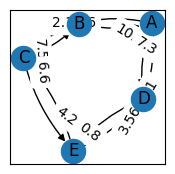

In [15]:
G=nx.from_pandas_adjacency(matrix, create_using=nx.DiGraph())
plt.figure(figsize=(2,2))
pos=nx.spring_layout(G)
nx.draw_networkx(G,with_labels=True, arrows=True, arrowstyle="-|>", connectionstyle ="arc3,rad=0.13")
pesos = nx.get_edge_attributes(G,"weight")
nx.draw_networkx_edge_labels(G, pos, pesos, label_pos=0.3)

In [ ]:
#Tarea
#Calcular mapas de calor y cuartiles 
#Seleccionar umbral al 50% y mapa de calor con umbral

In [23]:
import seaborn as sns
import numpy as np

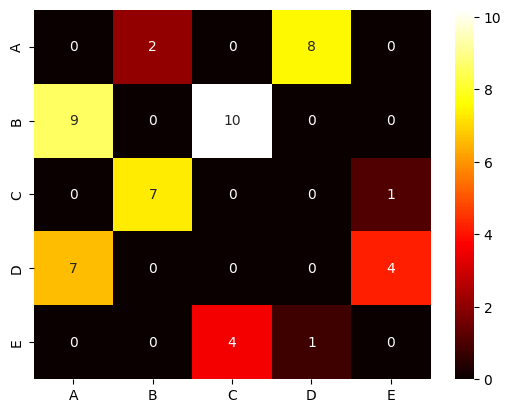

In [21]:
ax = sns.heatmap(matrix, annot=True, fmt=".0f", cmap='hot',
                xticklabels=matrix.columns, yticklabels=matrix.columns)
plt.show()

In [24]:
# Convertir a lista todos los pesos mayores que 0
pesos_lista = matrix.values.flatten()
pesos_lista = pesos_lista[pesos_lista > 0]

# Calcular cuartiles
q1 = np.percentile(pesos_lista, 25)
q2 = np.percentile(pesos_lista, 50)  # Umbral al 50%
q3 = np.percentile(pesos_lista, 75)

print("Q1:", q1)
print("Q2 (umbral 50%):", q2)
print("Q3:", q3)


Q1: 2.465
Q2 (umbral 50%): 5.4
Q3: 7.45


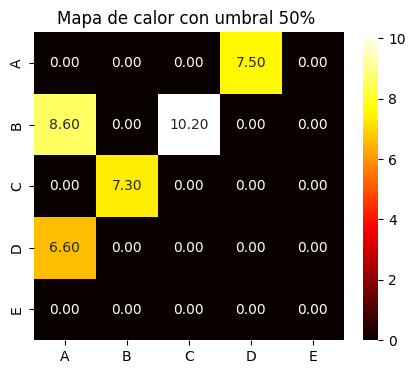

In [29]:


plt.figure(figsize=(5,4))
sns.heatmap(matrix_umbral, annot=True, cmap="hot", fmt=".2f")
plt.title("Mapa de calor con umbral 50% ")
plt.show()
